# PLAN

- INTRODUCCION: 
   - OBJETIVO DEL PROYECTO : Predecir la variable 'Cut? del data set de diamond
   - TIPO DE PROBLEMA A RESOLVER: Clasificacion mulitcas
   - METRICAS QUE SE UTILIZARAN ( accuracy, F!, etc ) 
  
- CARGA DE LIBRERIAS
  - carga de libreria necesarias - ( IMPORT VARIOS )
  
- CARGAR DATASET

- EDA (ANTES DE DIVIDIR y trasformar)
  - estidisticas basicas(METRICAS CENTRALIDAD Y DISTRIBUCION)
  - correlaciones
  - outlier
  - missing value
  - visualizaciones 

#######################################################     MODELADOS  ############################################################
  
- PREPARACION -  SEPARAR X /y
   -separacion para una unica feature
   - Separar features (X) y variable objetivo (y).
   - Puedes probar primero con una única feature para exploración rápida.
   - Importante: esta operación es antes de cualquier preprocesamiento
   - Separacion multiple. 
  

- TRAIN_TEST SLIT  (IMPORTANTISSIOMO: el X_test  no se usa hasta el final). Aqui utilizamo solo el train ( )
   - verificar proporcionees entre train y test, para asegurarse de que la muestra sea representativa 

- PREPOCESAMIENTO ( con Pipeline) . Es importante que esta operacion se haga despues de dividir X , y
  estas son formas de trasformar los datos en Scikit Learn 
  - Todo el preprocesamiento se hace solo sobre X_train (el pipeline se ajusta con train).
  - Incluye: escalado, codificación de variables categóricas, imputación, etc.
  - Esto asegura que no haya data leakage del test set.

- ENTRENAMIENDO MODELOS
  - cargar modelos que se quiern utilizar (LogisticRegression, RandomForest, SVM, etc.)
  - entrena el modelo ( X_train y y_train) 
  - calcular metricas de entrenamiento para ver desempeño inicial.
  - Aquí todavía no decides cuál es el mejor modelo; solo observas desempeño inicial.
  
  
- VALIDACION CRUZADA ( SE ELIGE EL MODELO. es implicito la evaluacion de rendimiento)
   - Se hace SOLO CON  con X_train / y_train para decidir el modelo ganador y ajustar hiperparámetros.
   - ver rapidamente OVERFITTING Y UNDERFITTING   
   - se valorara el rendimiento con metricas de entrenamiento vs metricas de CV 
       Error de Train mucho menor << que CV  --->  OVERFITTING ( el modelo aprendio demasiado los datos de train y no generaliza)       
       Error de Train  ≈ CV bajo --> UNDERFITTING ( el modelo es demasiado simple)
       Error de Train  ≈ CV alto --> MODELO BIEN AJUSTADO 
       
  - Valoración de rendimiento promedio en CV (cross_val_score).
  - metrica de rendimiento promedio ( CV )

- AJUSTE DE HIPERPARAMETROS  ( si es necesario)
   - Con GridSearchCV o RandomizedSearchCV sobre train usando CV
   - Esto produce el mejor modelo final listo para evaluación en test.

- EVALUACION FINAL
    - Entrenar el modelo seleccionado sobre todo X_train (ya con pipeline y mejores hiperparámetros).

- EVALUCION FINAL EN TEST ( es implicito al evaluacion de rendimiento)
  - Predecir con X_test.
  - Calcular métricas finales:
      Accuracy, F1, Precision/Recall, Confusion Matrix
  - Esta evaluación es la única que refleja desempeño real en datos no vistos.
  - evaluacion rendimiento en test
  - metrica de rendimiento final.
  
- INTERPRETACION - EVALUACION FINAL
  - Analizar: 
     Variables más importantes (feature importance si aplica)
     Patrones de error (dónde falla más)
     Posibles sesgos o problemas de generalización    

- CONCLUSIONES 
  Resumen de hallazgos:
     Qué modelo funcionó mejor
     Qué features son más relevantes
     Posibles mejoras futuras 

# Tareas a realizar
---
1. Introduccion
   - Contexto
   - Objectivo: Que queremos predecir y porques
    
2. Cargar el *dataset diamond* <https://www.kaggle.com/code/rolandmueller/seaborn-diamonds-2-11-2020/input> con Pandas
    
3. Realizar una **exploracion estadistica descriptiva** de los datos con Panda
   - Descripcion de las variables.
   - Correlacion 
   - Valores unicos ( Unique) , mas frecuentes ( top ) , frecuencia de valor mas comun (freq).
   - Inspeccion de balanceo varibales categoricas.
  
4. EDAS (Exploratory Data Analisys)   
   - Detectar valores nulos.
   - Corregir valores nulos.
   - Corregir tipos de datos.
   - Eliminar duplicados.
   - Identificar Outliers y tratarlos.
  
5. Visualizacion 
   - Univariante
   - Bivariante
   - Multivariante
  
6. Modelado
   - Probar *varios* modelos de Scikit Learn , para predecir la columna tip del dataset
   - Escalar las columnas numericas
   - Particionar los datos con *train_test_split*
   - Ver el mejor modelo

# 1. Indroduccion

Disponemos de un Data Set compuesto por 10 variables y 50.000 registos aproximadamente.

El objetivo es predecir la variable cut (corte) que representa la variable de calidad de corte ( Regular , Buena , Muy Buena, Premium , Ideal )  

### Import

- Celda reservada para la carga de modelos y librerias necesarrias para el desarrollo de la actividad

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snc

### Cargar DataSet 

- Cargamos el DataSet y mostramos las primeras 20 filas para supervisar el Data
- Mostramos los tipos de cada feature 

In [14]:
df = pd.read_csv('diamond.csv')
print(df.sample(n=5))

df.shape 

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
343           344   0.71  Very Good     E     VS2   64.0   57.0   2804  5.66   
45816       45817   0.50      Ideal     D     VS2   61.9   59.0   1712  5.07   
44087       44088   0.50      Ideal     E     VS2   62.1   55.0   1554  5.11   
32460       32461   0.36      Ideal     G    VVS2   61.8   54.0    794  4.59   
27190       27191   1.70       Good     D     VS2   63.6   56.0  17485  7.56   

          y     z  
343    5.68  3.63  
45816  5.10  3.15  
44087  5.13  3.18  
32460  4.61  2.84  
27190  7.50  4.79  


(53940, 11)

###  Descripcion FEATURE

In [70]:
data = {
    "Variable": [
        "carat", "cut", "color", "clarity", "depth",
        "table", "price", "x", "y", "z"
    ],
    "Descripción": [
        "Peso del diamante en quilates",
        "Calidad del corte",
        "Color del diamante (D mejor, J peor)",
        "Claridad del diamante",
        "Profundidad total = 2*z/(x+y)",
        "Anchura de la parte superior relativa al punto más ancho",
        "Precio del diamante en dólares estadounidenses",
        "Longitud en mm",
        "Anchura en mm",
        "Profundidad en mm"
    ],
    "Rango / Categorías": [
        "0.2 - 5.01",
        "Fair, Good, Very Good, Premium, Ideal",
        "D, E, F, G, H, I, J",
        "I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF",
        "43 79",
        "43 - 95",
        "326 - 18 823",
        "0 - 10.74",
        "0 - 58.9",
        "0 - 31.8"
    ]
}

df_info = pd.DataFrame(data)
df_info


,Variable,Descripción,Rango / Categorías
0,carat,Peso del diamante en quilates,0.2 - 5.01
1,cut,Calidad del corte,"Fair, Good, Very Good, Premium, Ideal"
2,color,"Color del diamante (D mejor, J peor)","D, E, F, G, H, I, J"
3,clarity,Claridad del diamante,"I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF"
4,depth,Profundidad total = 2*z/(x+y),43 79
5,table,Anchura de la parte superior relativa al punto...,43 - 95
6,price,Precio del diamante en dólares estadounidenses,326 - 18 823
7,x,Longitud en mm,0 - 10.74
8,y,Anchura en mm,0 - 58.9
9,z,Profundidad en mm,0 - 31.8


In [23]:
# comprobamos las columnas del data frame
df.columns.to_list()

['Unnamed: 0',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z']

- eliminamos columnas innecesarias

In [ ]:
# comprobamos antes de eliminar 
print("Columnas a eliminar:", df.columns[:1].tolist())

Columnas a eliminar: ['Unnamed: 0']


In [ ]:
# hacemos una copia del df original y realizamos el drop de la columna que no queremos y mostramos el resultado
df_copy = df.copy()
df_unnamed=df_copy.drop(df_copy.columns[:1], axis=1)
df_unnamed.columns.to_list()


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

### Redimensionamiento dataset
- Generamos un nuevo df reducido para evitar complejidad computacional.A partir de ahora nuestro df base será el df_reduced 

In [60]:
df_reduced=df_unnamed.sample(5000)

df_display = df_reduced.head().copy() 
df_display = df_display.reset_index(drop=True) 
df_display

#print(df_reduced.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.20,Very Good,H,SI1,62.3,57.0,6569,6.78,6.76,4.22
1,1.08,Very Good,F,VS2,63.1,57.0,6319,6.56,6.50,4.12
2,0.32,Premium,G,VS1,61.0,59.0,828,4.43,4.39,2.69
3,0.75,Premium,J,SI2,62.9,56.0,1588,5.76,5.72,3.61
4,0.35,Ideal,E,VS2,61.6,56.0,984,4.54,4.52,2.79


### Inspeccion del data set

- tipos de datos

In [69]:
# 
print(
    f"DATA FRAME ORIGINAL\n"
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )
print(
    f"DATA FRAME REDUCIDO \n"
    f"Numero de filas y columnas:{df_reduced.shape}\n"
    f"Numero total de elementos : {df_reduced.size}\n "
    )


print(df_reduced.dtypes.to_frame(name="TIPOS DE DATOS"))

DATA FRAME ORIGINAL
Numero de filas y columnas:(53940, 11)
Numero total de elementos : 593340
 
DATA FRAME REDUCIDO 
Numero de filas y columnas:(5000, 10)
Numero total de elementos : 50000
 
        TIPOS DE DATOS
carat          float64
cut                str
color              str
clarity            str
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64


  ### Revision NULOS - VALORES OCULIOS -  ESPACIOS EN BLANCOS
  - comprobamos si hay VALORES NULOS  en todo el dataframe original
  - comprobamos si hay ESPACIOS EN BLANCO en todo el dataframe original
  - comprobamos si hay VALORES OCULTOS  en todo el dataframe original

In [83]:
df_nulos = pd.DataFrame({    
    'nulos': df.isna().sum()                # muestra la suma de los nulos contenidos en las columnas 
})
df_espacios = pd.DataFrame({
    "espacios": df.apply(lambda col: col.astype(str).str.strip().eq("").sum())  
})


valores_ocultos = ["", " ", "NA", "N/A", "na", "null", "None", "?", "."]

df_ocultos = pd.DataFrame({
    "ocultos": df.isin(valores_ocultos).sum()   
})

df_Nan= pd.concat([df_nulos, df_espacios, df_ocultos ], axis=1)
df_Nan

,nulos,espacios,ocultos
Unnamed: 0,0,0,0
carat,0,0,0
cut,0,0,0
color,0,0,0
clarity,0,0,0
depth,0,0,0
table,0,0,0
price,0,0,0
x,0,0,0
y,0,0,0


- no se detectan valores nulos , ni valores ocultos ni espacios en blancos

# EDA

### Tabla de estadisticos principal para ver centralidad y dispercion

In [84]:
tabla_basica = df_reduced.describe(include='all').rename(index={
    'count': 'Total',
    'unique':'Valor unicos',
    'top': 'Valor + frecuente',
    'freq' :'Valor + comun',
    'mean' :'Media',
    'std':'Desviacion',
    'min': 'Valor minimo',
    'max': 'Valor maximo'
})

print(tabla_basica)

                         carat    cut color clarity        depth        table  \
Total              5000.000000   5000  5000    5000  5000.000000  5000.000000   
Valor unicos               NaN      5     7       8          NaN          NaN   
Valor + frecuente          NaN  Ideal     G     SI1          NaN          NaN   
Valor + comun              NaN   1974  1071    1203          NaN          NaN   
Media                 0.788428    NaN   NaN     NaN    61.771040    57.490880   
Desviacion            0.468038    NaN   NaN     NaN     1.420789     2.246633   
Valor minimo          0.200000    NaN   NaN     NaN    52.200000    49.000000   
25%                   0.390000    NaN   NaN     NaN    61.100000    56.000000   
50%                   0.700000    NaN   NaN     NaN    61.900000    57.000000   
75%                   1.030000    NaN   NaN     NaN    62.500000    59.000000   
Valor maximo          3.510000    NaN   NaN     NaN    70.600000    76.000000   

                          p

Report rapido sobre columnas numericas:
- en 'caract' hay cierta variacion , porque el valor de desviacion es bastante elevado respecto al valor medio, sin embargo la media y mediana coinciden. Presenta un valor maximo muy elevado
- en 'depth' y 'table' la desviacion es muy baja respecto al valor medio y la media y mediana son practicamente identicas.
- en 'price' hay mucha desviacion , con valores maximo muy grande y cierta variacion entre media y mediana sugeriendonos que pueden haber outliers
- en 'X' y 'Y' la desviacion no es grade y la media y mediana son practicamente identicas.
- en 'Z' la dessviacion es aun menor y la media y mediana coinciden.
- las variables cualitativas no parecen bien balanceadas, sobretodo en el caso de 'cut' cuyo valor mas comun es bastante elevado respecto al total (1974 / 5000 ), viendo ademas que hay nº 5 valores unicos y tambien en 'clarity' ( 1203/5000) con nº8 valores unicos.

,conteo,procentaje
cut,,
Ideal,1974,39.48
Premium,1263,25.26
Very Good,1139,22.78
Good,472,9.44
Fair,152,3.04


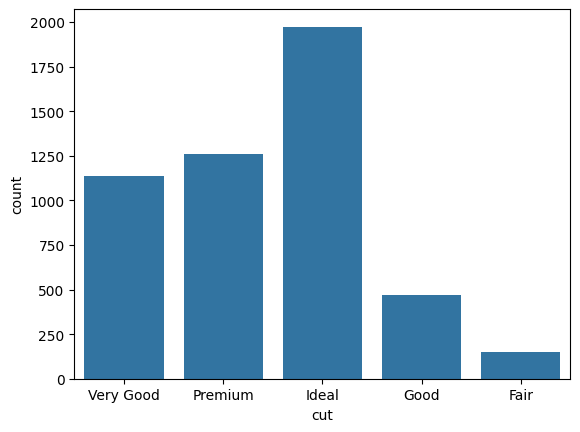

In [ ]:
# COMPROBAR BALANCEO      de la variable respuesta y 
df_balanceo = pd.DataFrame({
    "conteo": df_reduced['cut'].value_counts(),
    "procentaje":(df_reduced['cut'].value_counts(normalize=True)*100).round(2)
})
snc.countplot( df_reduced, x ='cut')
df_balanceo

Efectivamente podemos apreciar que los datos no estan balanceados.

### Grafico Var/Numericas

In [ ]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(df['carat'],bins=20,color='lightseagreen')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(df['depth'],bins=20,color='royalblue')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(df['price'],bins=20,color='salmon')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

# Segmentacion  X , y

# Train_test-split

# Preprocesamiento

# Entrenamiento
 - probar min. dos mdelos. LogistRegression , KNeightborClassifiar 
 - probar para cada modelo diferentes metricas. 

# Validacion cruzada

# Ajustes de Hiperparametros

# Evauacion Final

# Evaluacion Final en Test

-   nota: recuerda que puedes utilizar el predict_proba ( )para ver la probabilidad de que occurra por cada clase ( revisa el notebook de regresion-logistica) 

# Interpretacion - Evaluacion Final

# Conclusiones

In [ ]:
# EMBEDINGS 

# ATENCION VALOR LO DE UTILIZAR PIPELINE , NO LO HAG MANUALMENTE CON GET_DUMMIES O ONE_HOT 
# CON EL PIPELINE SEPARAREMOS TRASFORMACIONES SEGUN SEAN NUMERICAS( IMPUTER +SCALER pro ejemplo)  O CATEGORICAS ( imputer + encoder)
# esto scikit leanr lo agurpa en una unica matriz qeu se lo pasara al modelo 
# DESPUES PODEMOS CONSIDERAR HACER UN GRAFICO DE CALAR CON LA CORRELACION ENTRE VARIABLES + UN BARPLOT (GRAFICO DE BARRAS) PONIENDO LA COLUMNA QUE NOS INTERESA EN ESTE CASO SERA CUT CON EL RESTO 
# RECUERDA que ene ste ultimo grafico los valores mas cercano a uo son los que teiene mas correlacion.
# revisar tambien la Multicolinealidad ( es decir relaciones fuertes entre variables de X ) . hay solucines para esto  revisa el motebook de regresion multiple

# agrega columnas nuevas. En nuestro caso podria valer para cut, color y clarity
# evitamos hacer un map para que no se genere una cierta ordenacion con peos distintos 

-  revision rapida para ver lso datos de X y y para ver overfitng y underfiting 

In [ ]:
# PREPAR FEATURE Y TARGET

# X= df_reduced[[pongo la o las fetaure que considere]]   --> RECUERDA HACERLO POR PARTES, ES DECRI PRIMERO UNA Y DESPUES IR AÑADIENDOLE
# y = df_reduced['cut']

                # AQUI PODEMOS UTILIZAR EL SISTEMA MMONDTADO EN LA UNIDA 1 O EN LOS APUNTES DE REGRESION_MULTIMPLE_MPG donde hace un bucle for de predictores 
                # es interesante probar primero un modelo añadiendoles poco a podo datos de entrad
                # posteriormente podemos poner mas modelos y comparar. Ver aunque sea de regestion lineal , el notebook de penguins 
                #               
# HAGO EL TRAIN TEST SPLIT

# HAGO LA VALIDACION CON 
                # cross_val_score
                # cross_validate  -->  nos da info de cuanto tiempo tarda en entrenar y predecir. ES MUY IMPORTANTE PROQUE POR EJEMPO CUANTO MAS COLUMNAS HAYA MAS TARDE  

# entreno el modelo

# hago prediciones sobre el modelo
        # y_pred = modelo.predict(X_train)
        # y_pred =,odelo.predict (X_test)
        # esto lo hacemos para valorar si tenemos overfiting o underfitting. Es la forma de comparar y ver si hay mucha diferencia. 
        # tambien podramos graficar los residuos ( añade residuo vs prediciones, etc ) para revelar over, under etc. 


# calculo las metricas . SON EL RESUMEN DE TODOS LOs RESIDUOS. cUANTO MAS CERCANS A ZERO  MEJOR  
# evaluo 


# PREPARACION X,y

In [ ]:
## Función de verificación para ver distribucion entre train y test 

# def verificar_division(y_train, y_test, nombre_target="target"):
#     """Verifica que la división mantiene proporciones similares."""
#     print(f"Verificación de la división:")
#     print(f"  Muestras train: {len(y_train)}")
#     print(f"  Muestras test: {len(y_test)}")
#     print(f"  Ratio test: {len(y_test) / (len(y_train) + len(y_test)):.2%}")
#     
#     if hasattr(y_train, 'value_counts'):  # pandas Series
#         print(f"\n  Distribución en train:\n{y_train.value_counts(normalize=True)}")
#         print(f"\n  Distribución en test:\n{y_test.value_counts(normalize=True)}")
# 
# # Usar la función
# verificar_division(pd.Series(y_train), pd.Series(y_test))

# Dentro del flujo de tragbajao recomnedado tenenmos el cross_val-score para valorar los modelos y decidir seguir o cambiar de modelos.

 df
* X, y
* train_test_split --> X_train, X_test, y_train, y_test
* OPCIONAL( noe sobligatorio es solo apra entender mejor el modelo ) : cross_val_score(modelo, X_train, y_train) --> ver scores y decidir si cambiar de Algoritmo o va bien
  * opcionalmente: visualizar en boxplot los scores 8 tiene que ver algun que ootro notebook que lo muestre como hacerlo 

* Entrenamiento:
  * model.fit(X_train, y_train)   entrenamos con todos los datos de entrenamiento.

* Predicción:
  * Opción 1: model.score(X_test, y_test) (solo da una métrica, r2 o accuracy)
  
  * Opción 2: 
    * y_pred = model.predict(X_test)   -->  despues calcularemos los score ( o metrica)  que queremos de forma manual. 
    ejemplos: 
    * r2_score(y_test, y_pred)     
    * mean_absolute_error(y_test, y_pred)

* Si todo OK y queremos preparar el modelo para producción
  * model.fit(X, y) --> entrenamos con todos los datos. 

In [ ]:
# Cargar datos
#   cancer = load_breast_cancer()
#   X, y = cancer.data, cancer.target
#   
#   # Definir validación cruzada estratificada
#   cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#   
#   # Modelos a comparar
#   modelos = {
#       'Logistic Regression': LogisticRegression(max_iter=10000),
#       'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
#       'Decision Tree': DecisionTreeClassifier(random_state=42)
#   }
#   
#   # Evaluar cada modelo
#   resultados = []
#   for nombre, modelo in modelos.items():
#       scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
#       resultados.append({
#           'Modelo': nombre,
#           'Accuracy Media': scores.mean(),
#           'Std': scores.std(),
#           'Min': scores.min(),
#           'Max': scores.max()
#       })
#   
#   # Mostrar resultados
#   df_resultados = pd.DataFrame(resultados)
#   df_resultados = df_resultados.sort_values('Accuracy Media', ascending=False)
#   print(df_resultados.to_string(index=False))